In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, copy
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 100
I = 5    # number of locations
J = 3    # number of species
K = 2    # number of latent factors

In [3]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [5]:
M_alpha = np.eye(J)
M_lmbda = np.eye(J*K)

p_alpha = np.ones(J)
p_lmbda = np.ones((J*K))
zeta_alpha = 1
zeta_lmbda = 1

M = [M_alpha, M_lmbda]
p = [p_alpha, p_lmbda]
zeta = [zeta_alpha, zeta_lmbda]

100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


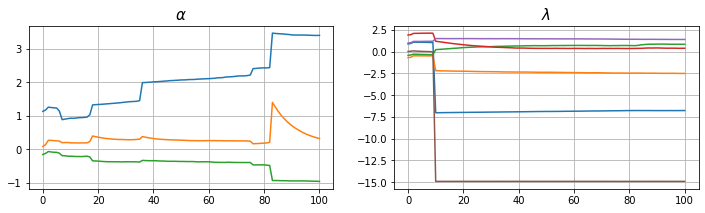

In [32]:
n_particles = 500
N = 100

nu_alpha = 2e-3
nu_lmbda = 2e-3
nu = [nu_alpha, nu_lmbda]
deltat = 5e-2

theta_chain_1, zeta_vals_1 = ODABADO(Y, x_0, n_particles, theta, N, M, deltat, nu, p, zeta, beta=1, sigmaA=1)
alpha_chain_1, lmbda_chain_1 = theta_chain_1[:]
zeta_alpha_vals_1, zeta_lmbda_vals_1 = zeta_vals_1[:]
plot_non_reversible(alpha_chain_1, np.reshape(lmbda_chain_1, [N+1,J,K]), burnin=0)

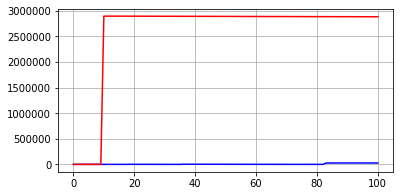

In [33]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.plot(zeta_alpha_vals_1, color="blue")
plt.plot(zeta_lmbda_vals_1, color="red")
plt.grid(True);

In [35]:
zeta_alpha_vals_1[-1], zeta_lmbda_vals_1[-1]

(27120.176083194234, 2882607.964741236)

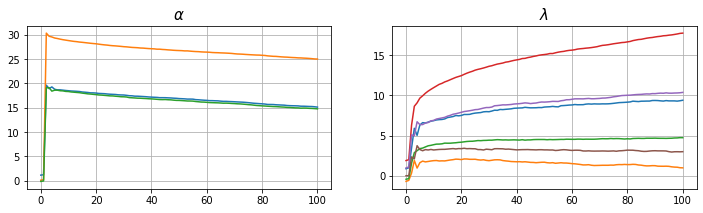

In [72]:
factor = 10

zeta = factor**1*np.asarray([27120.176083194234, 2882607.964741236])
zeta = np.zeros(2)
nu_alpha = 1e-3
nu_lmbda = 1e-3
nu = [nu_alpha, nu_lmbda]
deltat = factor*1e-2

N = 100

theta_chain_1, zeta_vals_1 = ODABADO(Y, x_0, n_particles, theta, N, M, deltat, nu, p, zeta, beta=1, sigmaA=0)
alpha_chain_1, lmbda_chain_1 = theta_chain_1[:]
zeta_alpha_vals_1, zeta_lmbda_vals_1 = zeta_vals_1[:]
plot_non_reversible(alpha_chain_1, np.reshape(lmbda_chain_1, [N+1,J,K]), burnin=0)

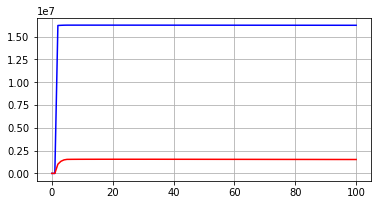

In [73]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.plot(zeta_alpha_vals_1, color="blue")
plt.plot(zeta_lmbda_vals_1, color="red")
plt.grid(True);

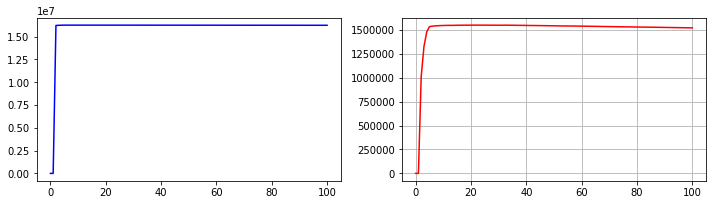

In [74]:
plt.rcParams['figure.figsize'] = (12, 3)
plt.subplot(121)
plt.plot(zeta_alpha_vals_1, color="blue")
plt.subplot(122)
plt.plot(zeta_lmbda_vals_1, color="red")
plt.grid(True);

In [13]:
corrs_lmbda_1 = get_corrs(np.reshape(lmbda_chain_1, [N+1,J,K]))
# corrs_lmbda_5 = get_corrs(lmbda_chain_5)

In [14]:
nu_alpha = 2e-3
nu_lmbda = 2e-3
nu = [nu_alpha, nu_lmbda]
deltat = 1.5e-1

In [18]:
n_particles = 200
N = 1000
theta_chain, zeta_vals = ODABADO(Y, x_0, n_particles, theta, N, M, deltat, nu, p, zeta, beta=1)
alpha_chain, lmbda_chain = theta_chain[:]
zeta_alpha_vals, zeta_lmbda_vals = zeta_vals[:]

  0%|          | 2/1000 [00:00<02:31,  6.60it/s]/home/postdoc/dsen/Desktop/codes/DC-BATS/ecology/ecology_functions.py:341: RuntimeWarning: divide by zero encountered in log
  logNC += np.log(np.mean(np.prod(local_weights,1)))
100%|██████████| 1000/1000 [01:59<00:00,  8.40it/s]


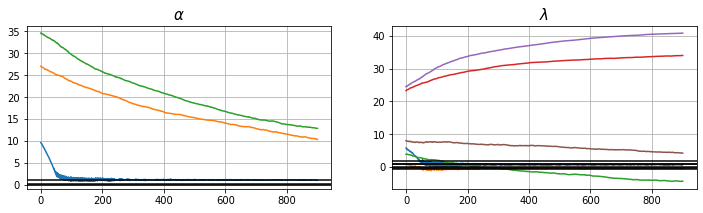

In [19]:
plt.rcParams['figure.figsize'] = (12, 3)
plt.subplot(121)
plt.plot(alpha_chain[100:])
for j in range(J) :
    plt.axhline(y=alpha[j], color="k")
plt.grid(True)
plt.title(r"$\alpha$", fontsize=15)
plt.subplot(122)
lmbda_chain = np.reshape(lmbda_chain, (N+1,J*K))
plt.plot(lmbda_chain[100:])
for idx in range(J*K) :
    plt.axhline(y=(lmbda.flatten())[idx], color="k")
plt.grid(True)
plt.title(r"$\lambda$", fontsize=15);

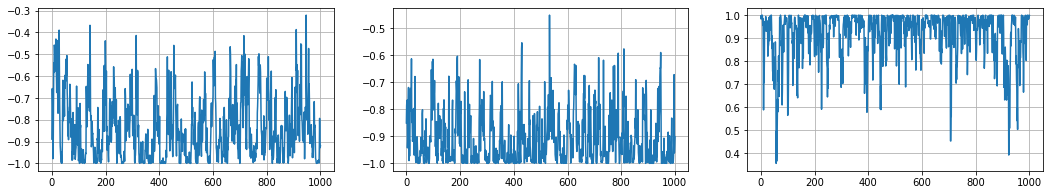

In [27]:
lmbda_chain = np.reshape(lmbda_chain, (N+1,J,K))
corr_lmbda = np.zeros((3,N+1))
corr_lmbda[0] = np.sum(lmbda_chain[:,0]*lmbda_chain[:,1],1)\
                 /(np.linalg.norm(lmbda_chain[:,0],axis=1)*np.linalg.norm(lmbda_chain[:,1],axis=1))
corr_lmbda[1] = np.sum(lmbda_chain[:,1]*lmbda_chain[:,2],1)\
                 /(np.linalg.norm(lmbda_chain[:,1],axis=1)*np.linalg.norm(lmbda_chain[:,2],axis=1))
corr_lmbda[2] = np.sum(lmbda_chain[:,2]*lmbda_chain[:,0],1)\
                 /(np.linalg.norm(lmbda_chain[:,2],axis=1)*np.linalg.norm(lmbda_chain[:,0],axis=1))

plt.rcParams['figure.figsize'] = (18, 3)
for idx in range(3) :
    plt.subplot(1,3,idx+1)
    plt.plot(corr_lmbda[idx])
    plt.grid(True)

In [37]:
np.var(corr_lmbda,1)/np.var(corr_lmbda_5,1)

array([1.28543968, 1.31667667, 2.41482694])

In [38]:
np.mean(corr_lmbda,1)/np.mean(corr_lmbda_5,1)

array([0.98251428, 0.99706035, 0.97784006])